In [2]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from shapely.geometry import box, shape
from gbdxtools import Interface
from gbdxtools import CatalogImage
from gbdxtools.task import env
from shapely.ops import cascaded_union
import fiona
from shapely.geometry import mapping, Polygon
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters, morphology
import gdal
import ogr, osr
from rasterio.plot import show

# connect to gbdx
gbdx = Interface()

In [3]:
#get image
catalog_id = env.inputs.get('catalog_id', '1030050045F94600')
bbox = env.inputs.get('bbox', '4.795532226562501, 52.36496281504866, 4.888916015625001, 52.41487819320523')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))

# test OSM get


In [ ]:
bb = nf.get_city_bounding_box('rotterdam')

bbox_wkt = box(*bb).wkt

In [ ]:
geojson_obj = gbdx.vectors.query(bbox_wkt,index="vector-osm-*", 
                                 query= "ingest_source:OSM AND attributes.highway:service AND geom_type:Polygon",
                                 count = 1e6)

Fetching Image... 153 tiles


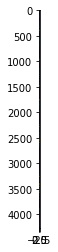

In [15]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
shapefile = gpd.read_file("extraction.shp")
# extract the geometry in GeoJSON format
geoms = shapefile.geometry.values # list of shapely geometries
geometry = geoms[0] # shapely geometry
# transform to GeJSON format
from shapely.geometry import mapping
geoms = [mapping(geoms[0])]
# extract the raster values values within the polygon 
with rasterio.open("raster.tif") as src:
     out_image, out_transform = mask(src, geoms, crop=True)
